### 6-3．教師データの作成
#### データの読み込み

In [1]:
import pandas as pd

# ファイルの読み込み
dat_df = pd.read_csv('data/energydata.csv', sep=',')[['date', 'Appliances']]

# dateをobject型からdatetime型へ変換
dat_df['date'] = pd.to_datetime(dat_df['date'], format='%Y-%m-%d %H:%M:%S')

# 先頭から5行目まで表示
dat_df.head()

,date,Appliances
0,2016-01-11 17:00:00,60
1,2016-01-11 17:10:00,60
2,2016-01-11 17:20:00,50
3,2016-01-11 17:30:00,50
4,2016-01-11 17:40:00,60


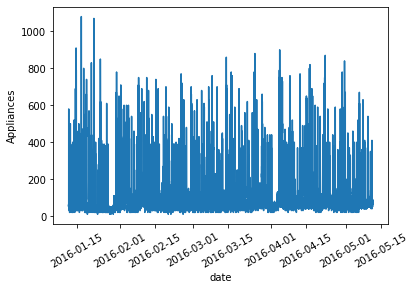

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dat_df['date'], dat_df['Appliances'])
plt.xlabel('date')
plt.xticks(rotation=30)
plt.ylabel('Appliances')
plt.show()

#### k近傍法による異常検知

In [3]:
# 訓練データとして3か月分を抽出
train_df = dat_df[dat_df['date'] < '2016-04-11 17:00:00']
print(train_df.shape)

# テストデータとして1か月分を抽出
test_df = dat_df[dat_df['date'] >= '2016-04-11 17:00:00']
print(test_df.shape)

(13104, 2)
(4320, 2)


In [4]:
# MinMaxScalerの読み込み
from sklearn.preprocessing import MinMaxScaler

# 訓練データとテストデータを範囲変換
mc = MinMaxScaler()
train = mc.fit_transform(train_df[['Appliances']])
test = mc.fit_transform(test_df[['Appliances']])

In [5]:
width = 144 # スライド窓の幅

train = train.flatten()
train_vec = []

# 部分時系列を抽出
for i in range(len(train)-width+1):
    train_vec.append(train[i:i+width])

# 部分時系列のサイズ確認
print(pd.DataFrame(train_vec).shape)
# 部分時系列の一部を表示
pd.DataFrame(train_vec)

(12961, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.046729,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,...,0.028037,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037
1,0.046729,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,...,0.018692,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729
2,0.037383,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,...,0.018692,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729
3,0.037383,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,...,0.018692,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916
4,0.046729,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,...,0.018692,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794
5,0.037383,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,0.084112,...,0.028037,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794,0.336449
6,0.046729,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,0.084112,0.084112,...,0.037383,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794,0.336449,0.205607
7,0.046729,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,0.084112,0.084112,0.074766,...,0.028037,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794,0.336449,0.205607,0.065421
8,0.046729,0.056075,0.205607,0.532710,0.392523,0.224299,0.084112,0.084112,0.074766,0.056075,...,0.028037,0.028037,0.046729,0.046729,0.186916,0.345794,0.336449,0.205607,0.065421,0.074766
9,0.056075,0.205607,0.532710,0.392523,0.224299,0.084112,0.084112,0.074766,0.056075,0.065421,...,0.028037,0.046729,0.046729,0.186916,0.345794,0.336449,0.205607,0.065421,0.074766,0.056075


In [6]:
# 練習問題7
test = test.flatten()
test_vec = []

# 部分時系列を抽出
for i in range(len(test)-width):
    test_vec.append(test[i:i+width])

# 部分時系列のサイズ確認
print(pd.DataFrame(test_vec).shape)
# 部分時系列の一部を表示
pd.DataFrame(test_vec).head()

(4176, 144)


,0,1,2,3,4,5,6,7,8,9,...,134,135,136,137,138,139,140,141,142,143
0,0.070588,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,...,0.035294,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294
1,0.070588,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,...,0.047059,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294
2,0.341176,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,...,0.047059,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412
3,0.400000,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,...,0.035294,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412
4,0.411765,0.129412,0.082353,0.105882,0.105882,0.094118,0.094118,0.082353,0.129412,0.141176,...,0.058824,0.047059,0.047059,0.058824,0.082353,0.435294,0.235294,0.129412,0.529412,0.705882


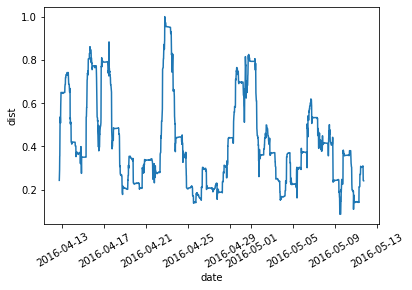

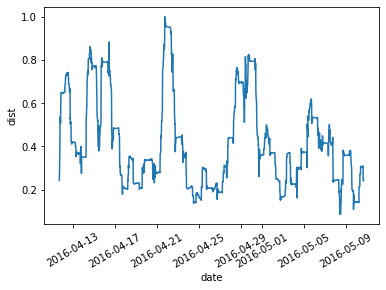

In [7]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Numpy配列の変換
train_vec = np.array(train_vec)
test_vec = np.array(test_vec)

# k=1の近傍モデル作成
model = NearestNeighbors(n_neighbors=1)
model.fit(train_vec)

# モデルをテストデータに適用
dist, _ = model.kneighbors(test_vec)
dist = dist / np.max(dist)

# 異常スコアの可視化
plt.plot(test_df['date'][width:], dist)
plt.xlabel('date')
plt.xticks(rotation=30)
plt.ylabel('dist')
plt.show()
plt.plot(test_df['date'][:len(test_df)-width], dist)
plt.xlabel('date')
plt.xticks(rotation=30)
plt.ylabel('dist')
plt.show()

#### オートエンコーダによる異常検知

In [8]:
# !pip install keras

In [9]:
# kerasの読み込み
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
# エンコード
model.add(Dense(128, activation='relu', input_shape=(144,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
# デコード
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# 出力層
model.add(Dense(144, activation='sigmoid'))

# 作成したネットワークの確認
model.summary()

ModuleNotFoundError: No module named 'keras'

In [10]:
# 学習条件の設定　誤差関数＝平均二乗誤差、最適化手法＝Adam法
model.compile(loss='mse', optimizer='adam')

# 学習の実行
hist = model.fit(train_vec, train_vec, batch_size=128, 
                 verbose=1, epochs=20, validation_split=0.2)

AttributeError: 'NearestNeighbors' object has no attribute 'compile'

In [11]:
# 誤差の収束具合を描画
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

NameError: name 'hist' is not defined

In [12]:
# モデルをテストデータに適用
pred = model.predict(test_vec)

# テストデータと出力データの可視化
plt.plot(test_vec[:,0], label='test')
plt.plot(pred[:,0], label='pred')
plt.legend()
plt.show()

AttributeError: 'NearestNeighbors' object has no attribute 'predict'

In [13]:
# 予測誤差（異常スコア）の計算
dist = test_vec[:,0] - pred[:,0]
dist = pow(dist, 2)
dist = dist / np.max(dist)

# 異常スコアの可視化
plt.plot(dist)
plt.show()

NameError: name 'pred' is not defined